In [1126]:
%matplotlib notebook
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1127]:
import numpy as np
import pandas as pd

In [1128]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1129]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [1130]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [1131]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [1132]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [1133]:
#Want to check table names -- returns the same as above
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [1134]:
engine.execute('SELECT * FROM Measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [1135]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [1136]:
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [1137]:
Station.__table__

Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)

In [1138]:
Measurement.__table__

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [1139]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [1140]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [1141]:
# Calculate the date 1 year ago from today
data_oneyear=dt.date(2018, 8, 6) - dt.timedelta(days=365)
print(data_oneyear)

# Design a query to retrieve the last 12 months of precipitation data and plot the results
precip_12mo = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > data_oneyear).order_by(Measurement.date).all()
print(precip_12mo)

2017-08-06
[('2017-08-07', 0.0), ('2017-08-07', 0.0), ('2017-08-07', 0.0), ('2017-08-07', 0.05), ('2017-08-08', 0.0), ('2017-08-08', 0.1), ('2017-08-08', 0.0), ('2017-08-08', 0.34), ('2017-08-09', 0.0), ('2017-08-09', 0.0), ('2017-08-09', 0.15), ('2017-08-10', 0.0), ('2017-08-10', 0.0), ('2017-08-10', 0.0), ('2017-08-10', 0.07), ('2017-08-11', 0.0), ('2017-08-11', 0.0), ('2017-08-11', 0.0), ('2017-08-11', None), ('2017-08-12', 0.0), ('2017-08-12', 0.0), ('2017-08-12', 0.14), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-13', 0.0), ('2017-08-13', 0.0), ('2017-08-13', None), ('2017-08-14', 0.0), ('2017-08-14', 0.01), ('2017-08-14', 0.08), ('2017-08-14', 0.0), ('2017-08-14', 0.22), ('2017-08-15', 0.02), ('2017-08-15', 0.0), ('2017-08-15', 0.06), ('2017-08-15', 0.32), ('2017-08-15', 0.42), ('2017-08-16', 0.0), ('2017-08-16', 0.07), ('2017-08-16', 0.12), ('2017-08-16', 0.42), ('2017-08-17', 0.0), ('2017-08-17', 0.05), ('2017-08-17', 0.01), ('2017-08-17', 0.13), ('2017-08-18', 0.0), (

In [1142]:
# Perform a query to retrieve the data and precipitation scores
precip_12mo_df=pd.DataFrame(precip_12mo)
precip_12mo_df.head()

# Save the query results as a Pandas DataFrame and set the index to the date column
mod1precip_12mo_df=precip_12mo_df.set_index('date')
mod1precip_12mo_df.head()

,prcp
date,
2017-08-07,0.00
2017-08-07,0.00
2017-08-07,0.00
2017-08-07,0.05
2017-08-08,0.00


In [1143]:
# Sort the dataframe by date
sortedprecip_12mo_df=precip_12mo_df.sort_values('date',ascending=True)
sortedprecip_12mo_df.head()

,date,prcp
0,2017-08-07,0.00
1,2017-08-07,0.00
2,2017-08-07,0.00
3,2017-08-07,0.05
4,2017-08-08,0.00


<IPython.core.display.Javascript object>


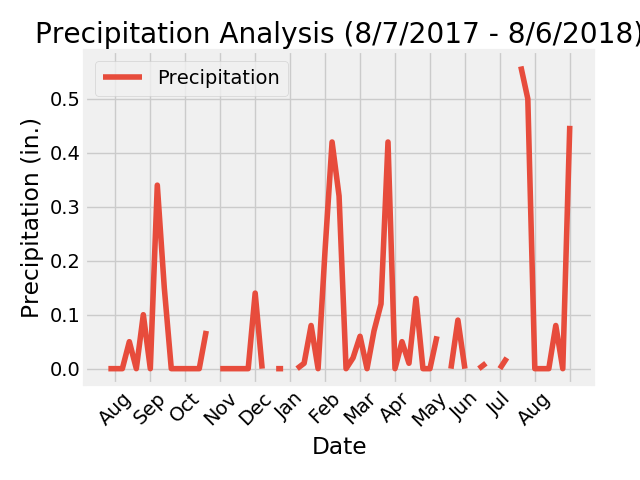

In [1144]:
# Use Pandas Plotting with Matplotlib to plot the data
# Rotate the xticks for the dates
sortedprecip_12mo_df.plot('date','prcp',color='#E74C3C')
plt.xlabel("Date")
plt.ylabel("Precipitation (in.)")
plt.title("Precipitation Analysis (8/7/2017 - 8/6/2018)")
plt.legend(["Precipitation"])

# Define months for x-ticks labels
months = ["Aug","Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Define x and y values
y = sortedprecip_12mo_df["prcp"].tolist()
x = np.arange(0, len(sortedprecip_12mo_df.index.tolist()), 1)
# Define months for x-axis labels
months = ["Aug","Sep", "Oct", "Nov", "Dec", "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"]

# Define x-axis labels (months) and their positioning
month_total = len(y)
month_step = int((month_total / 12)*1.03)
plt.ylim = max(y) + 1
tick_locations = [x for x in range(1, month_total, month_step)]

plt.xticks(tick_locations, months,rotation=45)
plt.tight_layout()
plt.show()


In [1145]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sortedprecip_12mo_df.describe()

,prcp
count,60.000000
mean,0.075833
std,0.140680
min,0.000000
25%,0.000000
50%,0.000000
75%,0.080000
max,0.560000


In [1146]:
# How many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(stations))

There are 9 stations.


In [1147]:
# List the stations and the counts in descending order.
stations_des=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
stations_des

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [1148]:
# What are the most active stations?
#Return top three most active stations
busy_three=stations_des[0:3]
print("The three most active stations and their associated counts:",busy_three)

The three most active stations and their associated counts: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709)]


In [1149]:
# Query all tobs values
results = session.query(Measurement.tobs).all()

# Convert tuples into list
tobs_values = list(np.ravel(results))
tobs_values

[65.0,
 63.0,
 74.0,
 76.0,
 73.0,
 70.0,
 64.0,
 68.0,
 73.0,
 64.0,
 61.0,
 66.0,
 65.0,
 68.0,
 64.0,
 72.0,
 66.0,
 66.0,
 69.0,
 67.0,
 67.0,
 71.0,
 67.0,
 76.0,
 68.0,
 72.0,
 70.0,
 67.0,
 66.0,
 67.0,
 69.0,
 67.0,
 67.0,
 64.0,
 69.0,
 73.0,
 73.0,
 69.0,
 69.0,
 69.0,
 71.0,
 61.0,
 69.0,
 63.0,
 64.0,
 65.0,
 67.0,
 68.0,
 65.0,
 76.0,
 75.0,
 66.0,
 70.0,
 72.0,
 73.0,
 70.0,
 71.0,
 72.0,
 72.0,
 69.0,
 70.0,
 73.0,
 72.0,
 73.0,
 70.0,
 71.0,
 68.0,
 70.0,
 72.0,
 69.0,
 68.0,
 74.0,
 72.0,
 72.0,
 73.0,
 74.0,
 73.0,
 73.0,
 74.0,
 74.0,
 74.0,
 71.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 73.0,
 73.0,
 71.0,
 71.0,
 68.0,
 70.0,
 71.0,
 74.0,
 71.0,
 75.0,
 76.0,
 75.0,
 75.0,
 76.0,
 76.0,
 76.0,
 77.0,
 77.0,
 73.0,
 74.0,
 76.0,
 76.0,
 80.0,
 74.0,
 77.0,
 77.0,
 76.0,
 77.0,
 78.0,
 78.0,
 75.0,
 73.0,
 77.0,
 76.0,
 77.0,
 77.0,
 78.0,
 75.0,
 77.0,
 77.0,
 77.0,
 76.0,
 75.0,
 77.0,
 77.0,
 77.0,
 78.0,
 76.0,
 78.0,
 76.0,
 77.0,
 78.0,
 77.0,
 78.0,
 78.0,
 79.0,

In [1150]:
#Convert tobs list to data frame
tobs_values_df=pd.DataFrame([tobs_values]).T
#tobs_values_df.rename(columns={'0':'Temperature (Deg. Fah.)'}, inplace=True)
tobs_values_df.head()

,0
0,65.0
1,63.0
2,74.0
3,76.0
4,73.0


In [1151]:
#Create data frame with stations and counts
stn_cnt_df=pd.DataFrame(stations_des,columns=['Station','Counts'])
stn_cnt_df.head()

,Station,Counts
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612


In [1152]:
#Find busiest station
busiest_stn=stations_des[0][0]
busiest_stn

'USC00519281'

In [1153]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

stn_temp = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == busiest_stn).filter(Measurement.date > data_oneyear).order_by(Measurement.date).all()
stn_temp

[('USC00519281', '2017-08-13', 77.0),
 ('USC00519281', '2017-08-14', 77.0),
 ('USC00519281', '2017-08-15', 77.0),
 ('USC00519281', '2017-08-16', 76.0),
 ('USC00519281', '2017-08-17', 76.0),
 ('USC00519281', '2017-08-18', 79.0)]

In [1154]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stn_tempobs = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == busiest_stn).\
    filter(Measurement.date >= data_oneyear).all()
stn_tempobs

[('USC00519281', 83.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 76.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0)]

In [1155]:
#Create data frame with stations, dates, and temperature
stn_tempobs_df=pd.DataFrame(stn_tempobs,columns=['Station','Temperature (Deg. Fah.)'])
stn_tempobs_df

,Station,Temperature (Deg. Fah.)
0,USC00519281,83.0
1,USC00519281,77.0
2,USC00519281,77.0
3,USC00519281,77.0
4,USC00519281,76.0
5,USC00519281,76.0
6,USC00519281,79.0


<IPython.core.display.Javascript object>


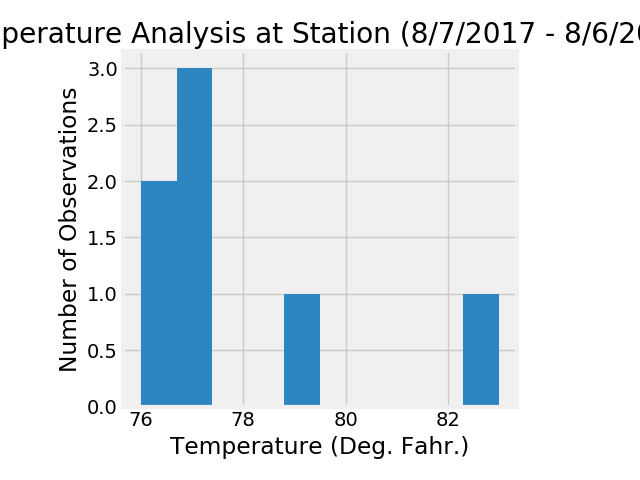

In [1156]:
#Plot histogram of temperature data

hist=stn_tempobs_df.hist(bins=10, color='#2E86C1')
plt.xlabel('Temperature (Deg. Fahr.)')
plt.ylabel('Number of Observations')
plt.title('Temperature Analysis at Station (8/7/2017 - 8/6/2018)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [1157]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps(start_date, end_date))

[(70.0, 78.74626865671642, 85.0)]


In [1158]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start_date='2017-08-07'
end_date='2018-08-06'

tcalcs=calc_temps(start_date,end_date)
tcalcs

[(70.0, 78.74626865671642, 85.0)]

In [1159]:
#Return TMAX, TAVE, TMIN

TMIN=tcalcs[0][0]
TAVE=tcalcs[0][1]
TMAX=tcalcs[0][2]

<IPython.core.display.Javascript object>


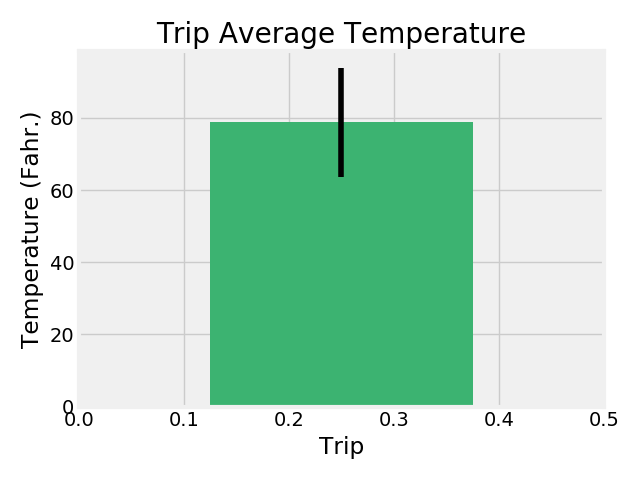

In [1160]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax=plt.subplots()
yerr_value =TMAX-TMIN
yerr_value
width=0.25

ax.bar(width, TAVE, width, color='#3CB371', align = 'center',ecolor='black',yerr=yerr_value, )

ax.set_title("Trip Average Temperature")
ax.set_ylabel("Temperature (Fahr.)")
ax.set_xlabel("Trip")
plt.xlim(0,0.5)
fig.tight_layout()
plt.show()

In [1161]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
stn_rainfall = session.query(Measurement.station, func.sum(Measurement.prcp)).filter(Measurement.date >= data_oneyear).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
stn_rainfall


[('USC00516128', 3.54),
 ('USC00519281', 0.51),
 ('USC00519523', 0.34),
 ('USC00514830', 0.13999999999999999),
 ('USC00519397', 0.02)]

## Optional Challenge Assignment

In [1162]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [1163]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [1164]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [1165]:
# Plot the daily normals as an area plot with `stacked=False`
